In [159]:
#PREDICTIVE M USING MACHINE LEARNING
#NASA TURBOFAN DATASET: A. Saxena and K. Goebel (2008). "Turbofan Engine Degradation Simulation Data Set",
#NASA Ames Prognostics Data Repository (http://ti.arc.nasa.gov/project/prognostic-data-repository),
#NASA Ames Research Center, Moffett Field, CA


import pandas as pd
import numpy as np
df_mant_train = pd.read_csv('./train_FD001.txt', sep='\s+', header=None)

df_mant_train.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8',
                         's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']

df_mant_test = pd.read_csv('./test_FD001.txt', sep='\s+', header=None)

df_mant_test.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8',
                         's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']

df_mant_RUL = pd.read_csv('./RUL_FD001.txt', header=None)

X_train = df_mant_train.iloc[:,0:].values
X_test = df_mant_test.iloc[:,0:].values

RUL = df_mant_RUL.values

df_mant_train.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [2]:
fail = []
lista = []
for i, _ in enumerate(X_train[:,0]):
    if i == 20630:
        break
    else:
        if X_train[i,0] != X_train[i+1,0]:
            fail.append(X_train[i, 1])

    
fail.append(200)

fail_test = []
cota_inf = []

for i, _ in enumerate(X_test[:,0]):
    if i == 13095:
        break
    else:
        if X_test[i,0] != X_test[i+1,0]:
            _dummy = X_test[i, 1] + int(RUL[_-1])
            cota_inf.append(X_test[i, 1])
            fail_test.append(_dummy)
        
fail_test.append(218)
cota_inf.append(198)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:21: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [27]:
lista = []
for i, j in enumerate(fail):
    lista.append(list(reversed(range(0, int(j),1))))
RUL_train = np.asarray(sum(lista, []))

RUL_class = []
for i in RUL_train:
    if i <= 30:
        RUL_class.append(1)
    else:
        RUL_class.append(0)

y_train = np.asarray(RUL_class)

print('Training vector', y_train.shape)

lista = []
RUL_test = []
for j, i in zip(fail_test, cota_inf):
    lista.append(list(reversed(range(int(j-i), int(j),1))))
RUL_test = np.asarray(sum(lista, []))

RUL_class_test = []
for i in RUL_test:
    if i <= 30:
        RUL_class_test.append(1)
    else:
        RUL_class_test.append(0)
        
y_test = np.asarray(RUL_class_test)
print('Test vector', y_test.shape)

('Training vector', (20631,))
('Test vector', (13096,))


In [59]:
X_train = df_mant_train.iloc[:,1:].values
X_test = df_mant_test.iloc[:,1:].values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.fit_transform(X_test)

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.9 * (1- 0.9)))
X_sel_train = sel.fit_transform(X_train)
print (X_sel_train.shape)
X_sel_test = sel.fit_transform(X_test)

(20631, 9)


In [109]:
#LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=10, class_weight='balanced')
log_reg.fit(X_train_norm, y_train)
print('Train accuracy: %.3f' % (log_reg.score(X_train_norm, y_train)))
print('Test accuracy: %.3f' % (log_reg.score(X_test_norm, y_test)))
y_pred_test = log_reg.predict(X_test_norm)
scores = cross_val_score(estimator=log_reg, X=X_train_norm, y=y_train, cv=10, scoring='roc_auc')
print('ROC AUC: %0.2f +/- %0.2f' % (scores.mean(), scores.std()))

Train accuracy: 0.942
Test accuracy: 0.864
ROC AUC: 0.99 +/- 0.00


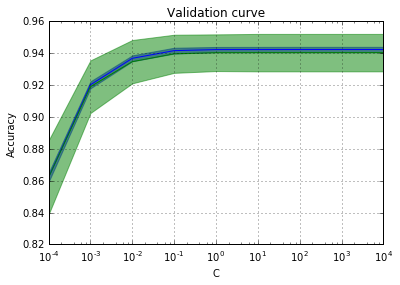

In [117]:
from sklearn.learning_curve import validation_curve
param_range=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
train_scores, test_scores = validation_curve(estimator=log_reg, X=X_train_norm, y=y_train,
                                             param_name='C', param_range=param_range, cv=5)
train_mean=np.mean(train_scores, axis=1)
train_std=np.std(train_scores, axis=1)
test_mean=np.mean(test_scores, axis=1)
test_std=np.std(test_scores, axis=1)
%matplotlib inline
plt.plot(param_range, train_mean, label='Training accuracy')
plt.fill_between(param_range, train_mean - train_std, train_mean +train_std, color='blue', alpha=0.5)
plt.plot(param_range, test_mean, label='validation accuracy')
plt.fill_between(param_range, test_mean - test_std, test_mean +test_std, color='green', alpha=0.5)
plt.legend(loc='lower right')
plt.grid()
plt.xlabel('C')
plt.ylabel('CV Accuracy')
plt.xscale('log')
plt.show()

In [148]:
#DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score

tree = DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=0, class_weight='balanced')
tree.fit(X_train_norm, y_train)
y_pred_test = tree.predict(X_test_norm)
y_pred_train = tree.predict(X_train_norm)
acc = accuracy_score(y_pred_test, y_test)
acc2 = accuracy_score(y_pred_train, y_train)

print('Train Accuracy %.3f' % acc2)
print('Test Accuracy %.3f' % acc)
scores = cross_val_score(estimator=tree, X=X_train_norm, y=y_train, cv=10, scoring='roc_auc')
print('ROC AUC: %0.2f +/- %0.2f' % (scores.mean(), scores.std()))

Train Accuracy 0.929
Test Accuracy 0.838
ROC AUC: 0.98 +/- 0.01


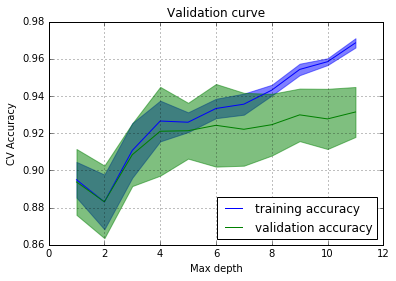

In [146]:
from sklearn.learning_curve import validation_curve
param_range=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
train_scores, test_scores = validation_curve(estimator=tree, X=X_train_norm, y=y_train,
                                             param_name='max_depth', param_range=param_range, cv=5)
train_mean=np.mean(train_scores, axis=1)
train_std=np.std(train_scores, axis=1)
test_mean=np.mean(test_scores, axis=1)
test_std=np.std(test_scores, axis=1)
%matplotlib inline
plt.plot(param_range, train_mean, label='training accuracy')
plt.fill_between(param_range, train_mean - train_std, train_mean +train_std, color='blue', alpha=0.5)
plt.plot(param_range, test_mean, label='validation accuracy')
plt.fill_between(param_range, test_mean - test_std, test_mean +test_std, color='green', alpha=0.5)
plt.title('Validation curve')
plt.grid()
plt.legend(loc='lower right')
plt.xlabel('Max depth')
plt.ylabel('CV Accuracy')
plt.show()

In [157]:
#K NEIGHREST NEIGHBORS
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10, p=2, metric='minkowski')
knn.fit(X_train_norm, y_train)
y_pred_test = knn.predict(X_test_norm)
y_pred_train = knn.predict(X_train_norm)
acc = accuracy_score(y_pred_test, y_test)
acc2 = accuracy_score(y_pred_train, y_train)

print('Train Accuracy %.3f' % acc2)
print('Test Accuracy %.3f' % acc)
scores = cross_val_score(estimator=knn, X=X_train_norm, y=y_train, cv=10, scoring='roc_auc')
print('ROC AUC: %0.2f +/- %0.2f' % (scores.mean(), scores.std()))

Train Accuracy 0.967
Test Accuracy 0.942
ROC AUC: 0.98 +/- 0.01


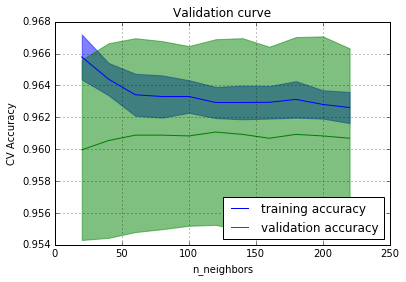

In [156]:
from sklearn.learning_curve import validation_curve
param_range=[20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220]
train_scores, test_scores = validation_curve(estimator=knn, X=X_train_norm, y=y_train,
                                             param_name='n_neighbors', param_range=param_range, cv=5)
train_mean=np.mean(train_scores, axis=1)
train_std=np.std(train_scores, axis=1)
test_mean=np.mean(test_scores, axis=1)
test_std=np.std(test_scores, axis=1)
%matplotlib inline
plt.plot(param_range, train_mean, label='training accuracy')
plt.fill_between(param_range, train_mean - train_std, train_mean +train_std, color='blue', alpha=0.5)
plt.plot(param_range, test_mean, label='validation accuracy')
plt.fill_between(param_range, test_mean - test_std, test_mean +test_std, color='green', alpha=0.5)
plt.title('Validation curve')
plt.grid()
plt.legend(loc='lower right')
plt.xlabel('n_neighbors')
plt.ylabel('CV Accuracy')
plt.show()

ROC: 0.985


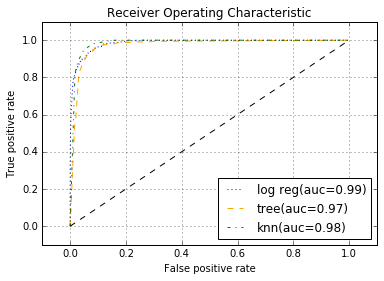

In [153]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
%matplotlib inline

all_clf = [log_reg, tree, knn]
clf_labels = ['log reg', 'tree', 'knn']
colors = ['blue', 'orange', 'green']
linestyles =[':', '--', '-.']

for clf, label, clr, ls in zip(all_clf, clf_labels, colors, linestyles):
    y_pred = clf.fit(X_train_norm, y_train).predict_proba(X_test_norm)[:, 1]
    fpr, tpr, threshold = roc_curve(y_true=y_test, y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr, color=clr, linestyle=ls, label='%s(auc=%0.2f)' % (label, roc_auc))


plt.plot([0, 1], [0, 1], linestyle='--', c='black')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid()
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()